 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = Path("../PANDAS-HW/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls '
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("../PANDAS-HW/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns_df.isnull().sum()
algo_returns_df.dropna(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [8]:
# Drop nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../PANDAS-HW/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history_df.sort_index(inplace=True)
print(sp500_history_df)

               Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93
...              ...
2019-04-16  $2907.06
2019-04-17  $2900.45
2019-04-18  $2905.03
2019-04-22  $2907.97
2019-04-23  $2933.68

[1649 rows x 1 columns]


In [10]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace('$','')
sp500_history_df["Close"]= sp500_history_df["Close"].astype('float')
sp500_history_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp_history_daily_returns = sp500_history_df.pct_change()
sp_history_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp_history_daily_returns.isnull().sum()
sp_history_daily_returns.dropna(inplace = True)
sp_history_daily_returns.isnull().sum()
sp_history_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename Column
sp_history_daily_returns = sp_history_daily_returns.rename(columns={"Close": "SP500"})
sp_history_daily_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp_history_daily_returns], axis = 'columns', join= 'inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

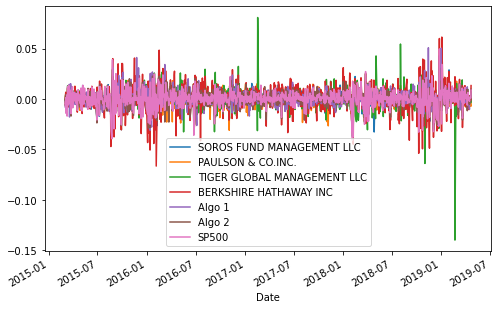

In [16]:
# Plot daily returns
combined_df.plot(figsize=(8,5))

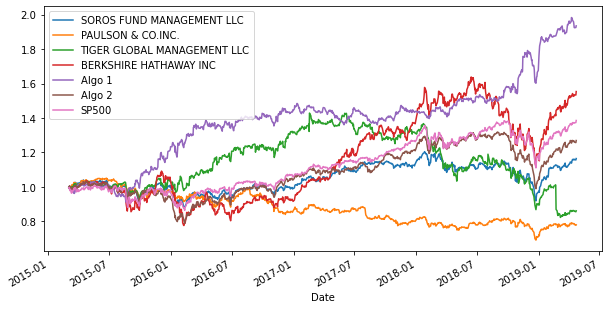

In [17]:
# Plot cumulative returns
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot(figsize=(10,5))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

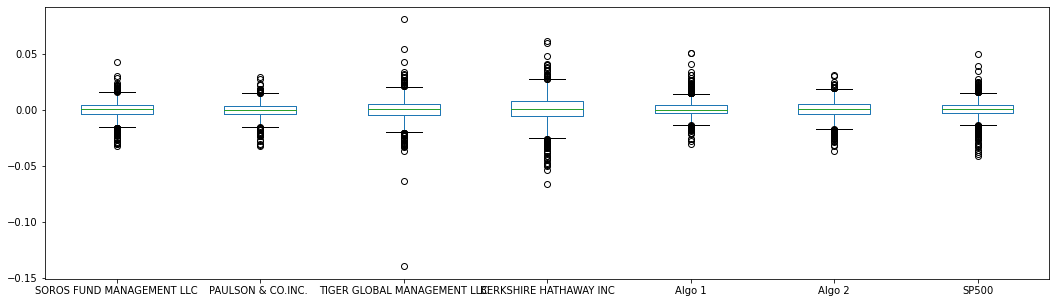

In [18]:
# Box plot to visually show risk
combined_df.plot.box(figsize= (18,5))

In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
portfolio_std = combined_df.std()
portfolio_std.head(7)



SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

In [48]:
# Determine which portfolios are riskier than the S&P 500
riskier = portfolio_std > portfolio_std['SP500']
riskier

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = portfolio_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

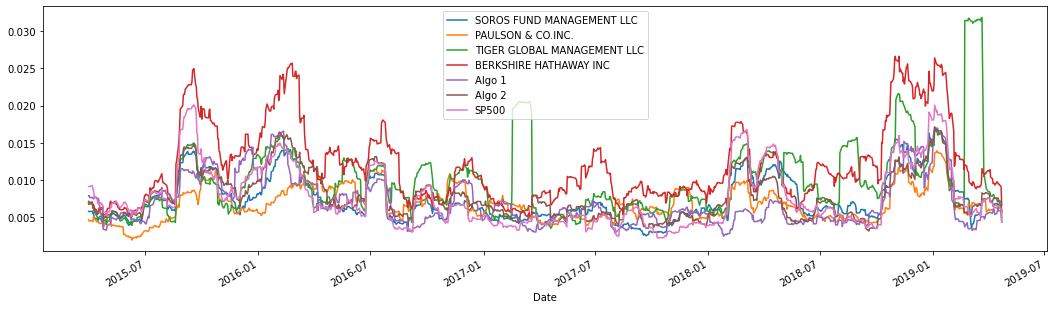

In [22]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_df.rolling(window=21).std().plot(figsize= (18,5))

In [23]:
# Construct a correlation table

combined_corr = combined_df.corr()
combined_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


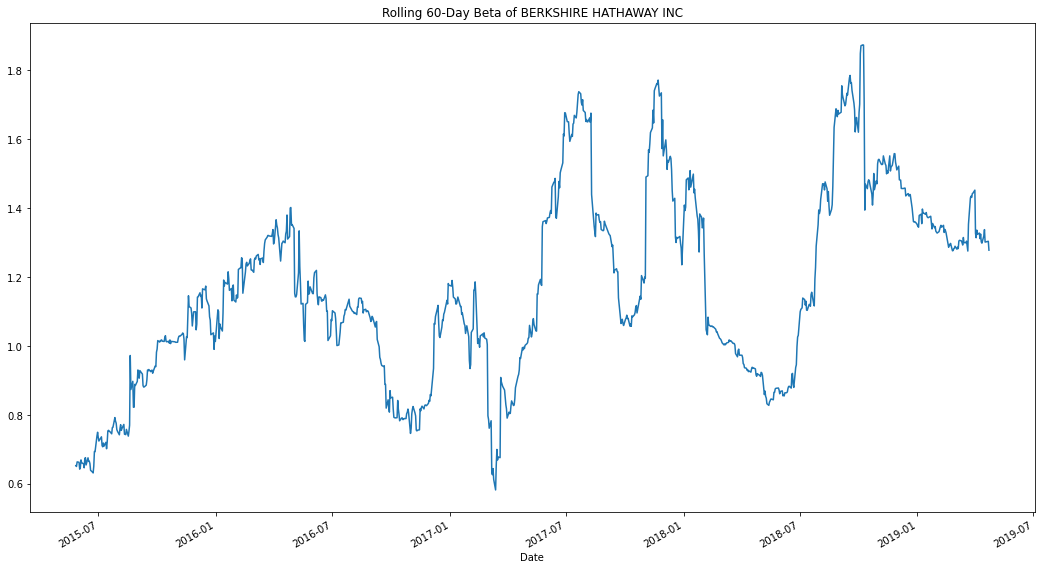

In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
berkshire_covariance = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['SP500'])
berkshire_covariance
variance = combined_df['SP500'].var()
variance
berkshire_beta = berkshire_covariance/variance
berkshire_beta
rolling_berkshire_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['SP500'])
rolling_variance = combined_df['SP500'].rolling(window=60).var()
rolling_berkshire_beta = rolling_berkshire_covariance / rolling_variance
ax = rolling_berkshire_beta.plot(figsize=(18, 10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

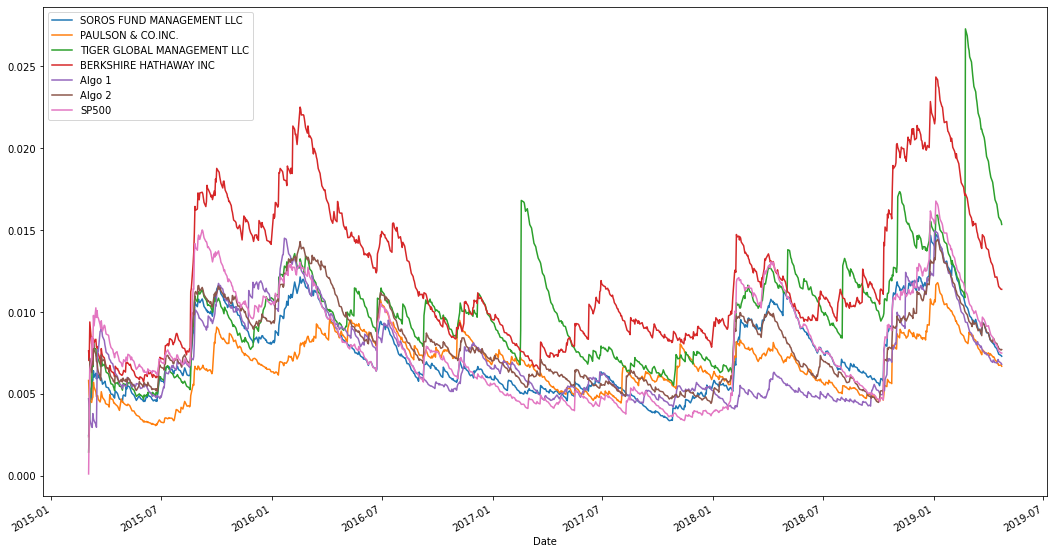

In [25]:
# Calculate a rolling window using the exponentially weighted moving average. 
combined_df.ewm(halflife=21).std().plot(figsize= (18,10))


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [26]:
# Calculate annualized Sharpe Ratios
combined_sharpe_ratios = (combined_df.mean() * 252) / (annualized_std)
combined_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

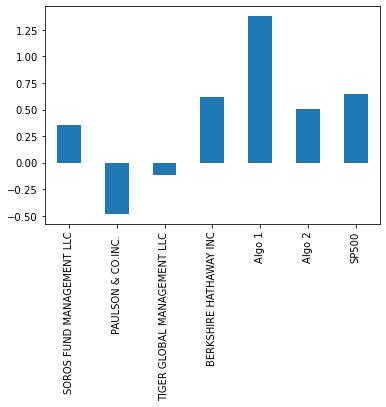

In [27]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(kind='bar')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: Yes!

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
aapl_path = ("../PANDAS-HW/aapl.csv")
lulu_path = ("../PANDAS-HW/lulu.csv")
ups_path = ("../PANDAS-HW/ups.csv")

In [29]:
# Read the first stock
aapl_df = pd.read_csv(aapl_path, parse_dates=True, infer_datetime_format=True)
aapl_df['Dates'] = pd.to_datetime(aapl_df['Date']).dt.date
aapl_df['Time'] = pd.to_datetime(aapl_df['Date']).dt.time
aapl_df.set_index("Dates", inplace=True)
aapl_df.head()

,Date,Close,Time
Dates,,,
2015-10-12,10/12/2015 16:00:00,27.90,16:00:00
2015-10-13,10/13/2015 16:00:00,27.95,16:00:00
2015-10-14,10/14/2015 16:00:00,27.55,16:00:00
2015-10-15,10/15/2015 16:00:00,27.97,16:00:00
2015-10-16,10/16/2015 16:00:00,27.76,16:00:00


In [30]:
lulu_df = pd.read_csv(lulu_path, parse_dates=True, infer_datetime_format=True)
lulu_df['Dates'] = pd.to_datetime(lulu_df['Date']).dt.date
lulu_df['Time'] = pd.to_datetime(lulu_df['Date']).dt.time
lulu_df.set_index("Dates", inplace=True)
lulu_df.head()

,Date,Close,Time
Dates,,,
2015-10-12,10/12/2015 16:00:00,51.91,16:00:00
2015-10-13,10/13/2015 16:00:00,51.58,16:00:00
2015-10-14,10/14/2015 16:00:00,51.54,16:00:00
2015-10-15,10/15/2015 16:00:00,52.52,16:00:00
2015-10-16,10/16/2015 16:00:00,53.81,16:00:00


In [31]:
# Read the third stock
ups_df = pd.read_csv(ups_path, parse_dates=True, infer_datetime_format=True)
ups_df['Dates'] = pd.to_datetime(ups_df['Date']).dt.date
ups_df['Time'] = pd.to_datetime(ups_df['Date']).dt.time
ups_df.set_index("Dates", inplace=True)
ups_df.head()

,Date,Close,Time
Dates,,,
2015-10-12,10/12/2015 16:00:00,104.41,16:00:00
2015-10-13,10/13/2015 16:00:00,103.30,16:00:00
2015-10-14,10/14/2015 16:00:00,102.86,16:00:00
2015-10-15,10/15/2015 16:00:00,103.80,16:00:00
2015-10-16,10/16/2015 16:00:00,103.95,16:00:00


In [32]:
# Concatenate all stocks into a single DataFrame
my_portfolio = pd.concat([ups_df, aapl_df, lulu_df], axis = 'columns', join= 'inner')
my_portfolio.drop(columns = ["Date", "Time"], inplace = True)
columns = ["UPS", "AAPL", "LULU"]
my_portfolio.columns = columns

my_portfolio.head()

,UPS,AAPL,LULU
Dates,,,
2015-10-12,104.41,27.90,51.91
2015-10-13,103.30,27.95,51.58
2015-10-14,102.86,27.55,51.54
2015-10-15,103.80,27.97,52.52
2015-10-16,103.95,27.76,53.81


In [33]:
my_portfolio.isnull().sum()
my_portfolio.dtypes

UPS     float64
AAPL    float64
LULU    float64
dtype: object

In [34]:
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.head()

,UPS,AAPL,LULU
Dates,,,
2015-10-12,NaN,NaN,NaN
2015-10-13,-0.010631,0.001792,-0.006357
2015-10-14,-0.004259,-0.014311,-0.000775
2015-10-15,0.009139,0.015245,0.019014
2015-10-16,0.001445,-0.007508,0.024562


In [35]:
my_portfolio_returns.isnull().sum()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.dtypes

UPS     float64
AAPL    float64
LULU    float64
dtype: object

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
my_custom_portfolio = my_portfolio_returns.dot(weights)

my_custom_portfolio


Dates
2015-10-13   -0.005065
2015-10-14   -0.006449
2015-10-15    0.014466
2015-10-16    0.006166
2015-10-19   -0.000372
                ...   
2020-10-05    0.019866
2020-10-06   -0.017647
2020-10-07    0.026495
2020-10-08   -0.002758
2020-10-09    0.015121
Length: 1258, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
all_df = pd.concat([combined_df, my_custom_portfolio], axis= 'columns', join='inner')
columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON& CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "SP500", "Custom"]
all_df.columns = columns
all_df.index.name = 'Date'
all_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON& CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Custom
Date,,,,,,,,
2015-10-13,-0.008954,-0.011397,-0.003732,-0.026306,0.001488,-0.009775,-0.006825,-0.005065
2015-10-14,0.000325,0.004492,-0.004681,-0.018380,-0.003559,-0.002834,-0.004716,-0.006449
2015-10-15,0.011446,0.006206,0.018472,0.002557,-0.001653,0.015905,0.014853,0.014466
2015-10-16,0.003941,0.004157,0.006173,0.005243,0.006359,-0.003778,0.004570,0.006166
2015-10-19,-0.004318,-0.001756,0.000460,0.007145,0.009801,-0.003041,0.000271,-0.000372


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON& CO.INC.               0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
Custom                         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

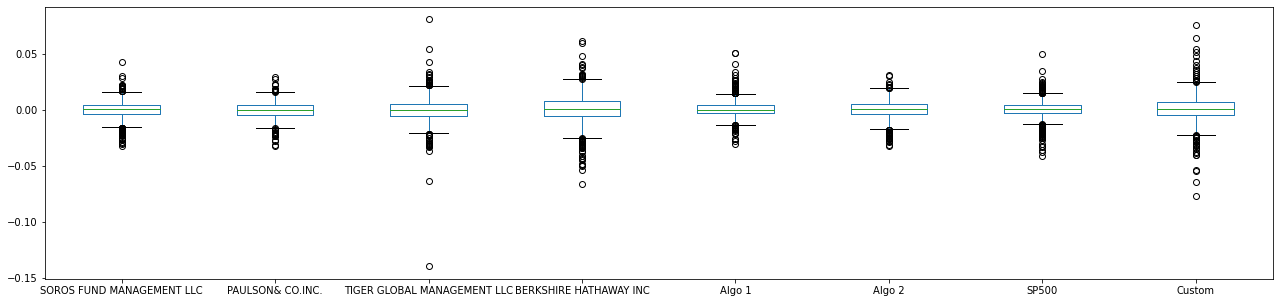

In [39]:
all_df.plot.box(figsize= (22,5))

In [40]:
# Risk
all_df_std = all_df.std()
all_df_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007865
PAULSON& CO.INC.               0.007216
TIGER GLOBAL MANAGEMENT LLC    0.011335
BERKSHIRE HATHAWAY INC         0.013014
Algo 1                         0.007494
Algo 2                         0.008308
SP500                          0.008245
Custom                         0.012262
dtype: float64

In [41]:
dict = {}
for index, value in all_df_std.items():
    dict[index] = value
series = pd.Series()
for keys in dict.keys():
    if dict["SP500"] < dict[keys]:
        series[keys]= True
    
    else:
        series[keys]= False
print(series)

SOROS FUND MANAGEMENT LLC      False
PAULSON& CO.INC.               False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                          True
SP500                          False
Custom                          True
dtype: bool


In [42]:
annual_std_df = all_df_std * np.sqrt(252)
annual_std_df

SOROS FUND MANAGEMENT LLC      0.124856
PAULSON& CO.INC.               0.114551
TIGER GLOBAL MANAGEMENT LLC    0.179938
BERKSHIRE HATHAWAY INC         0.206595
Algo 1                         0.118965
Algo 2                         0.131879
SP500                          0.130879
Custom                         0.194654
dtype: float64

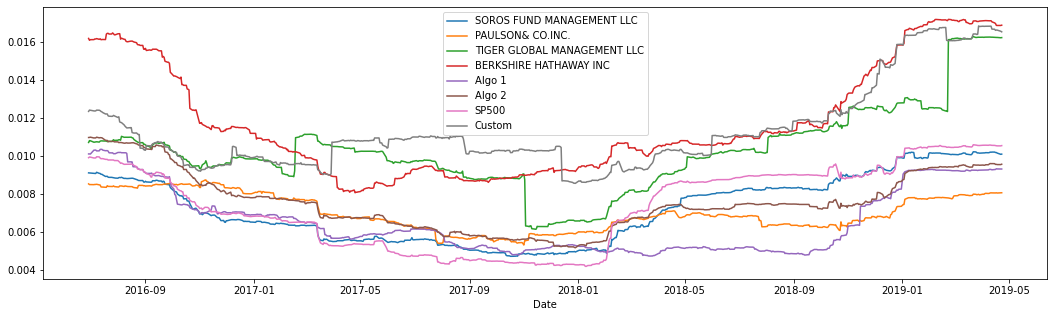

In [43]:
# Rolling
all_df.rolling(window=180).std().plot(figsize= (18,5))

In [44]:
# Annualized Sharpe Ratios
customized_sharpe_ratios = (all_df.mean() * 252) / (annual_std_df)
customized_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.490271
PAULSON& CO.INC.              -0.454017
TIGER GLOBAL MANAGEMENT LLC   -0.111629
BERKSHIRE HATHAWAY INC         0.763907
Algo 1                         1.438712
Algo 2                         0.633185
SP500                          0.878441
Custom                         1.145051
dtype: float64

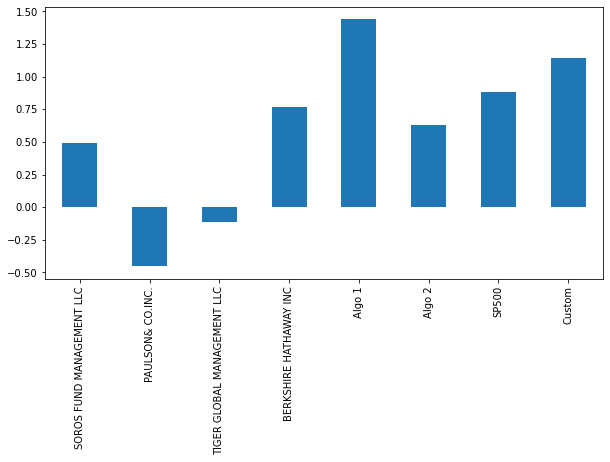

In [45]:
# Visualize the sharpe ratios as a bar plot
customized_sharpe_ratios.plot(kind= 'bar', figsize=(10,5))

In [46]:
# Create a correlation analysis
costumized_corr = all_df.corr()
costumized_corr

,SOROS FUND MANAGEMENT LLC,PAULSON& CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.683352,0.525492,0.747411,0.289614,0.816545,0.828519,0.582309
PAULSON& CO.INC.,0.683352,1.000000,0.402686,0.525611,0.253616,0.667544,0.663241,0.469822
TIGER GLOBAL MANAGEMENT LLC,0.525492,0.402686,1.000000,0.389683,0.144868,0.465979,0.587160,0.418375
BERKSHIRE HATHAWAY INC,0.747411,0.525611,0.389683,1.000000,0.262983,0.675380,0.754937,0.575899
Algo 1,0.289614,0.253616,0.144868,0.262983,1.000000,0.276095,0.263092,0.154733
Algo 2,0.816545,0.667544,0.465979,0.675380,0.276095,1.000000,0.856034,0.603783
SP500,0.828519,0.663241,0.587160,0.754937,0.263092,0.856034,1.000000,0.695453
Custom,0.582309,0.469822,0.418375,0.575899,0.154733,0.603783,0.695453,1.000000


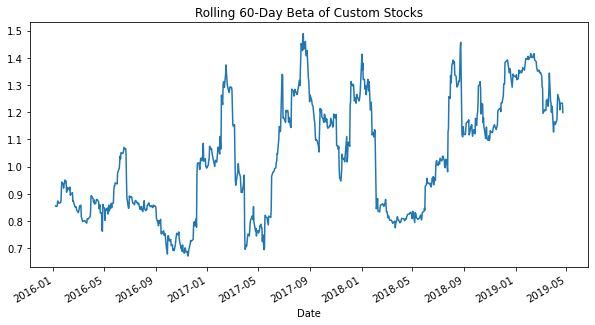

In [47]:
# Beta
custom_covariance = all_df['Custom'].cov(combined_df['SP500'])

variance = all_df['SP500'].var()

custom_beta = custom_covariance/variance

rolling_custom_covariance = all_df['Custom'].rolling(window=60).cov(combined_df['SP500'])
rolling_variance = all_df['SP500'].rolling(window=60).var()
rolling_custom_beta = rolling_custom_covariance / rolling_variance
ax = rolling_custom_beta.plot(figsize=(10, 5), title='Rolling 60-Day Beta of Custom Stocks')